<a href="https://colab.research.google.com/github/Rajat-Singh-Chouhan/oil-well-log/blob/main/lithology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
ds=pd.read_csv("/content/drive/MyDrive/lithology_input.csv")

In [240]:
ds.head()

,gamma ray,density,neutron porosity,lithology
0,73.59512,2.58541,0.37612,limestone
1,73.97836,2.55129,0.41289,limestone
2,72.04334,2.57068,0.38331,limestone
3,72.76338,2.60603,0.37881,limestone
4,66.89448,2.59872,0.39401,limestone


In [241]:
ds_limestone=ds.loc[ds["lithology"]=="limestone"]
ds_dolomite=ds.loc[ds["lithology"]=="dolomite"]
ds_shale=ds.loc[ds["lithology"]=="shale"]
ds_sandstone=ds.loc[ds["lithology"]=="sandstone"]

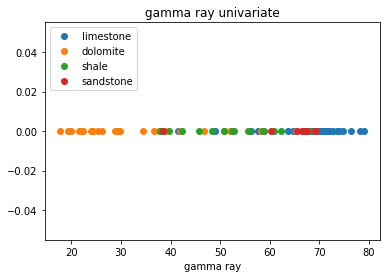

In [242]:
plt.plot(ds_limestone["gamma ray"],np.zeros_like(ds_limestone["gamma ray"]),"o")
plt.plot(ds_dolomite["gamma ray"],np.zeros_like(ds_dolomite["gamma ray"]),"o")
plt.plot(ds_shale["gamma ray"],np.zeros_like(ds_shale["gamma ray"]),"o")
plt.plot(ds_sandstone["gamma ray"],np.zeros_like(ds_sandstone["gamma ray"]),"o")
plt.title("gamma ray univariate")
plt.xlabel("gamma ray")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

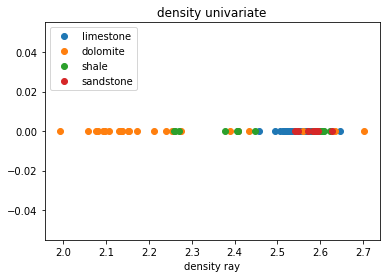

In [243]:
plt.plot(ds_limestone["density"],np.zeros_like(ds_limestone["density"]),"o")
plt.plot(ds_dolomite["density"],np.zeros_like(ds_dolomite["density"]),"o")
plt.plot(ds_shale["density"],np.zeros_like(ds_shale["density"]),"o")
plt.plot(ds_sandstone["density"],np.zeros_like(ds_sandstone["density"]),"o")
plt.title("density univariate")
plt.xlabel("density ray")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

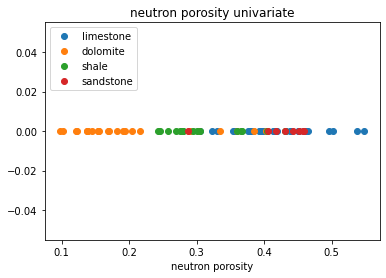

In [244]:
plt.plot(ds_limestone["neutron porosity"],np.zeros_like(ds_limestone["neutron porosity"]),"o")
plt.plot(ds_dolomite["neutron porosity"],np.zeros_like(ds_dolomite["neutron porosity"]),"o")
plt.plot(ds_shale["neutron porosity"],np.zeros_like(ds_shale["neutron porosity"]),"o")
plt.plot(ds_sandstone["neutron porosity"],np.zeros_like(ds_sandstone["neutron porosity"]),"o")
plt.title("neutron porosity univariate")
plt.xlabel("neutron porosity")
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


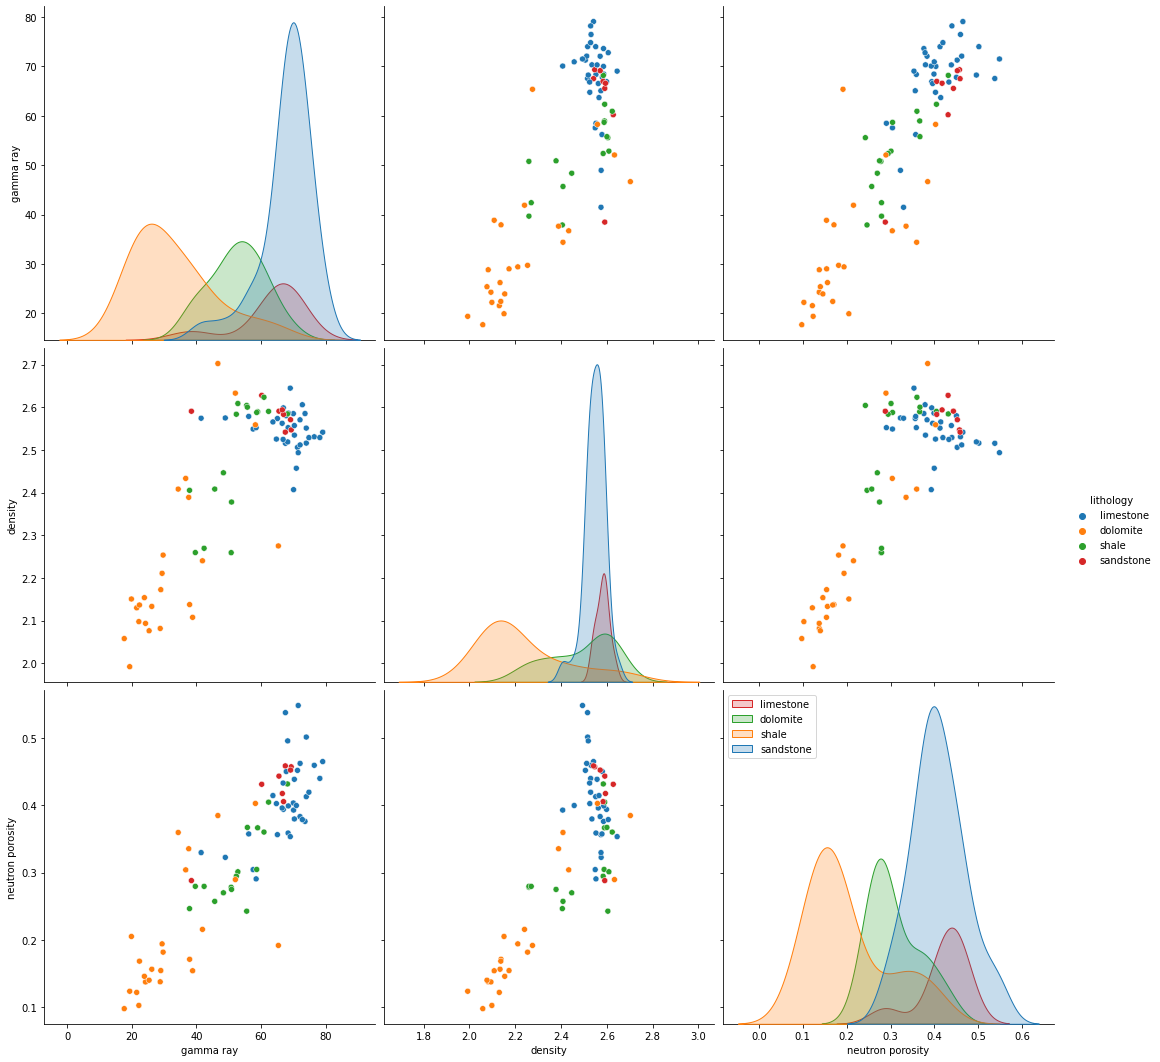

In [245]:
sns.pairplot(ds, hue="lithology", size=5)
plt.legend(['limestone', 'dolomite','shale','sandstone'], loc='upper left')


KNN Algorithm

In [246]:
df=pd.read_csv("/content/drive/MyDrive/lithology_output.csv")
df.head()

,limestone,dolomite,shale,sandstone
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [247]:
x=ds.loc[:, ds.columns != "lithology"]
y=df.loc[:, ["limestone","dolomite","shale","sandstone"]]


In [248]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [249]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [250]:
y_pred= classifier.predict(x_test) 
print(y_test)
print(y_pred)

    limestone  dolomite  shale  sandstone
30          0         0      0          1
0           1         0      0          0
22          1         0      0          0
31          0         0      0          1
18          1         0      0          0
28          0         1      0          0
10          1         0      0          0
53          0         1      0          0
4           1         0      0          0
[[0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]


In [251]:
from sklearn.metrics import confusion_matrix  
# cm= confusion_matrix(y_test, y_pred)
CM = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

In [252]:
print(CM)

[[4 0 0 1]
 [0 1 1 0]
 [0 0 0 0]
 [2 0 0 0]]


In [253]:
from sklearn.metrics import classification_report
CR = classification_report(y_test,y_pred,output_dict=False,target_names=['limestone',  'dolomite',  'shale',  'sandstone'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
print(CR)

              precision    recall  f1-score   support

   limestone       1.00      0.40      0.57         5
    dolomite       1.00      0.50      0.67         2
       shale       0.00      0.00      0.00         0
   sandstone       0.00      0.00      0.00         2

   micro avg       0.60      0.33      0.43         9
   macro avg       0.50      0.23      0.31         9
weighted avg       0.78      0.33      0.47         9
 samples avg       0.33      0.33      0.33         9



In [255]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


ANN algorithm suitable

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [257]:
df=pd.read_csv("/content/drive/MyDrive/lithology_output.csv")
df.head() 

,limestone,dolomite,shale,sandstone
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [258]:
x=ds.loc[:, ds.columns != "lithology"]
y=df.loc[:, ["limestone","dolomite","shale","sandstone"]]

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [260]:
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer="normal", activation="relu" ))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 16        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.compile(loss='BinaryCrossentropy', optimizer="adam")
result=model.fit(x_train, y_train, epochs=500, verbose= 1, batch_size = 5, validation_split=0.1) 

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 0.6919 - val_loss: 0.6902
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6893 - val_loss: 0.6875
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6867 - val_loss: 0.6848
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6842 - val_loss: 0.6823
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6817 - val_loss: 0.6797
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6792 - val_loss: 0.6770
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6767 - val_loss: 0.6743
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6743 - val_loss: 0.6717
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6719 - val_loss: 0.6691
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6696 - val_loss: 0.6670
Epoch 11

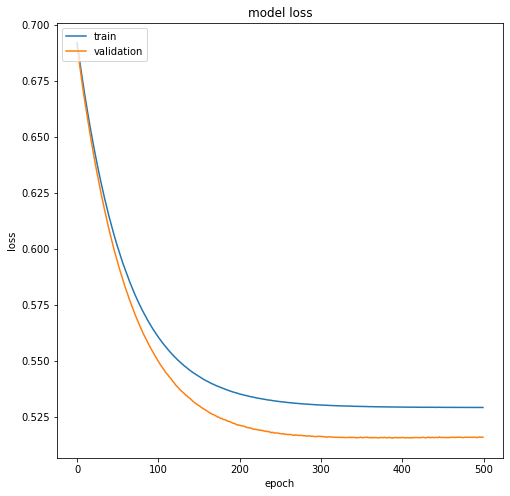

In [262]:
plt.figure(figsize=(8, 8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [263]:
y_pred=model.predict(x_test)

In [264]:
print(y_pred)

[[0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]
 [0.40462005 0.33032596 0.07439045 0.19066352]]


In [265]:
from sklearn.metrics import confusion_matrix,classification_report

In [266]:
y_test

,limestone,dolomite,shale,sandstone
30,0,0,0,1
0,1,0,0,0
22,1,0,0,0
31,0,0,0,1
18,1,0,0,0
28,0,1,0,0
10,1,0,0,0
53,0,1,0,0
4,1,0,0,0


In [267]:
y_pred

array([[0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352],
       [0.40462005, 0.33032596, 0.07439045, 0.19066352]], dtype=float32)

In [268]:

for i in range(len(y_pred)):
  for j in range(4):
    mx = max(y_pred[i])
    if y_pred[i][j]==mx:
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0
y_pred

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [269]:
classification_report(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.56      1.00      0.71         5\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         0\n           3       0.00      0.00      0.00         2\n\n   micro avg       0.56      0.56      0.56         9\n   macro avg       0.14      0.25      0.18         9\nweighted avg       0.31      0.56      0.40         9\n samples avg       0.56      0.56      0.56         9\n'

In [270]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555555555555556


Decision tree

In [271]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_model=DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features="sqrt")
mse_dt=cross_val_score(dt_model,x_train,y_train,scoring="neg_mean_squared_error",cv=20)
mean_mse_dt=np.mean(mse_dt)
print(mse_dt,mean_mse_dt)
dt_model.fit(x_train,y_train)

[-0.125      -0.25       -0.125      -0.         -0.25       -0.
 -0.125      -0.         -0.125      -0.25       -0.         -0.125
 -0.         -0.         -0.16666667 -0.16666667 -0.16666667 -0.16666667
 -0.         -0.        ] -0.10208333333333333


DecisionTreeClassifier(max_features='sqrt')

In [273]:
y_pred_dt=dt_model.predict(x_test)
print(y_pred_dt)
print(y_test)

[[0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]
    limestone  dolomite  shale  sandstone
30          0         0      0          1
0           1         0      0          0
22          1         0      0          0
31          0         0      0          1
18          1         0      0          0
28          0         1      0          0
10          1         0      0          0
53          0         1      0          0
4           1         0      0          0


In [274]:
dt_score=dt_model.score(x_test,y_test)
print(dt_score)

0.8888888888888888


<function matplotlib.pyplot.show(*args, **kw)>

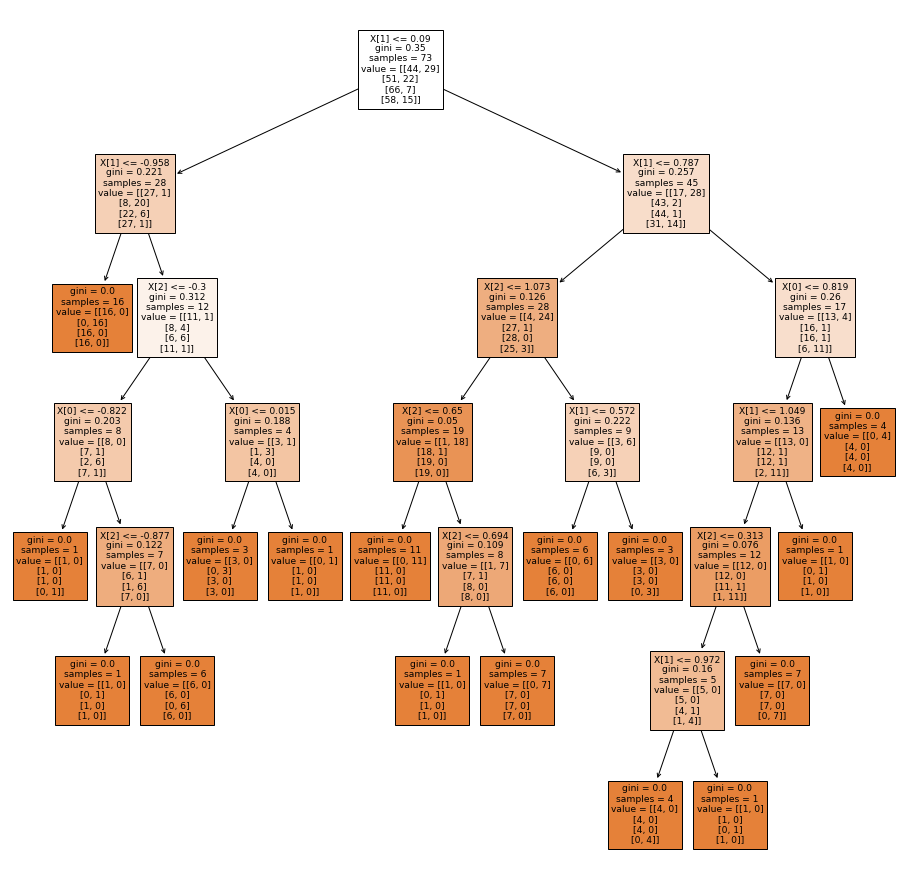

In [275]:
from sklearn import tree
plt.figure(figsize=(16,16))
tree.plot_tree(dt_model, filled="true")
plt.show

Navie Baye's

In [276]:
y = y.to_numpy()

In [277]:
z = []
for i in range(len(y)):
  if y[i][0]==1:
    z.append(1)
  elif y[i][1]==1:
    z.append(2)
  elif y[i][2]==1:
    z.append(3)
  else:
    z.append(4)

In [278]:
y = pd.DataFrame(z)

In [279]:
x_gnb = x
y_gnb = y
x_gnb_train, x_gnb_test, y_gnb_train, y_gnb_test = train_test_split(x_gnb,y_gnb, test_size = 0.2, random_state =103 )

In [280]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_gnb_train,y_gnb_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [281]:
y_gnb_pred = gnb.predict(x_gnb_test)

In [282]:
y_gnb_pred

array([2, 4, 2, 2, 4, 1, 2, 2, 2, 1, 1, 4, 1, 2, 4, 1, 1])

In [283]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_gnb_test, y_gnb_pred))

Accuracy: 0.7647058823529411
